In [1]:
file_path = '/content/CBOW.txt'

with open(file_path, 'r') as file:
    file_contents = file.read()

In [2]:
file_contents

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n\nThe reproductive number – the number of secondary infections generated from one infected individual – is understood to be betwe

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sample sentences
sentences = file_contents.split('.')

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

# Generate context-target pairs for training
window_size = 3
# tokenizer.fit_on_texts(sentences)
tokenized_sentences = tokenizer.texts_to_sequences(sentences)

data, labels = [], []
for sentence in tokenized_sentences:
    for i, target_word in enumerate(sentence):
        context = [
            sentence[j] for j in range(i - window_size, i + window_size + 1)
            if j != i and 0 <= j < len(sentence)
        ]
        data.append(context)
        labels.append(target_word)

# Convert data and labels to numpy arrays
data = pad_sequences(data)
labels = np.array(labels)

# Define CBOW model
embedding_dim = 50

model = models.Sequential([
    layers.Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=window_size * 2),
    layers.GlobalAveragePooling1D(),
    layers.Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(data, labels, epochs=350, verbose=1)

# Get the word embeddings
word_embeddings = model.get_layer(index=0).get_weights()[0]

# Save or use the word embeddings as needed


Epoch 1/350
7/7 [==============================] - 1s 3ms/step - loss: 4.6344 - accuracy: 0.0152
Epoch 2/350
7/7 [==============================] - 0s 3ms/step - loss: 4.6253 - accuracy: 0.0909
Epoch 3/350
7/7 [==============================] - 0s 3ms/step - loss: 4.6178 - accuracy: 0.1515
Epoch 4/350
7/7 [==============================] - 0s 3ms/step - loss: 4.6106 - accuracy: 0.1818
Epoch 5/350
7/7 [==============================] - 0s 3ms/step - loss: 4.6029 - accuracy: 0.2071
Epoch 6/350
7/7 [==============================] - 0s 3ms/step - loss: 4.5951 - accuracy: 0.1970
Epoch 7/350
7/7 [==============================] - 0s 3ms/step - loss: 4.5870 - accuracy: 0.2020
Epoch 8/350
7/7 [==============================] - 0s 3ms/step - loss: 4.5783 - accuracy: 0.1970
Epoch 9/350
7/7 [==============================] - 0s 3ms/step - loss: 4.5693 - accuracy: 0.1869
Epoch 10/350
7/7 [==============================] - 0s 3ms/step - loss: 4.5590 - accuracy: 0.1970
Epoch 11/350
7/7 [===========

In [4]:
word_embeddings = model.layers[0].get_weights()[0]

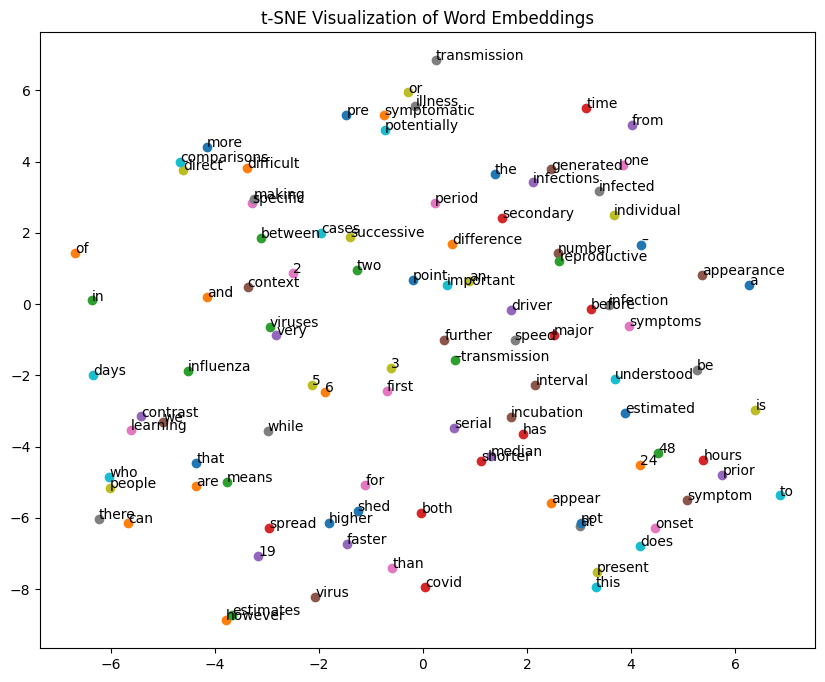

In [7]:
# Fit t-SNE model on word embeddings
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)

# Visualization
plt.figure(figsize=(10, 8))
for word, idx in tokenizer.word_index.items():
    plt.scatter(word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1])
    plt.annotate(word, (word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.show()

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'influenza'
target_embedding = word_embeddings[tokenizer.word_index[target_word]]

similarities = cosine_similarity(target_embedding.reshape(1, -1), word_embeddings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]

most_similar_words = [word for word, idx in tokenizer.word_index.items() if idx in most_similar_indices]

print(f"Most similar words to '{target_word}': {most_similar_words}")

Most similar words to 'influenza': ['influenza', 'virus', 'can', 'means', 'faster']


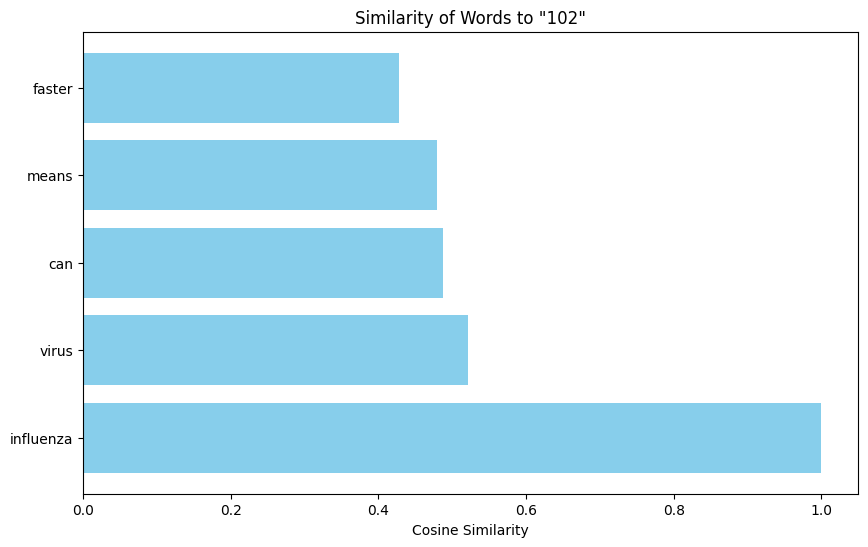

In [8]:
# Plot cosine similarities
plt.figure(figsize=(10, 6))
plt.barh(most_similar_words, similarities[most_similar_indices], color='skyblue')
plt.xlabel('Cosine Similarity')
plt.title(f'Similarity of Words to "{target_word}"')
plt.show()